<a href="https://colab.research.google.com/github/Joshika-Mentor/-Kid-s-Screentime-Visualization-Infosys-springboard-program-/blob/M.Mohammed-Salman/Salman_Infosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition and Understanding**

Dataset Overview
This dataset contains rows representing individual participants aged between 8 and 18 years. Each record includes details about screen usage habits such as average daily hours, device types, and self-reported health impacts. The goal appears to be studying the relationship between screen usage patterns, environment, and indicators of well-being.

Variables and Structure
The variable Age represents each participant's age and is numeric. Gender records whether the participant is male or female. Avg_Daily_Screen_Time_hr measures the average daily screen time in hours, offering a direct indicator of digital exposure.
Primary_Device specifies which device (such as smartphone, laptop, TV, or tablet) is primarily used by each participant. The variable Exceeded_Recommended_Limit is a boolean field (True/False) that indicates whether an individual's screen time surpasses WHO's recommended daily limit.
Educational_to_Recreational_Ratio gives a numeric ratio showing how much time participants spend on educational use versus recreational use. Health_Impacts records health problems associated with screen usage, including issues like Poor Sleep, Eye Strain, Anxiety, or Obesity Risk, and is a multi-label categorical field. Finally, Urban_or_Rural denotes whether the participant lives in an urban or rural area.

Key Observations
The dataset exhibits substantial diversity in age, gender, and device usage. Most entries show screen time exceeding the recommended daily limit, suggesting overexposure is prevalent. Smartphones dominate as the most frequently used device, while the educational-to-recreational ratio generally ranges between 0.3 and 0.5, indicating that recreational use outweighs educational use.
Health impacts are widespread, with Poor Sleep appearing most often, followed by Eye Strain and Anxiety. Many entries list multiple health outcomes, reinforcing that excessive screen exposure can have compounding effects.

Data Quality and Consistency
The dataset is well-formed with no missing values or inconsistent data types across columns. Numeric, categorical, and boolean values are properly formatted. The Health_Impacts column may require preprocessing in analysis stages to split multiple conditions into separate boolean indicators for effective modeling.

Data Understanding Summary
Overall, this dataset offers a valuable foundation for analysis on how average screen time, age, environment, and device preference affect physical and mental health. It provides clear, well-organized information that can be used to explore relationships between digital behavior and lifestyle outcomes within adolescent populations.

**Upload and Load the Data**

In [61]:
# Upload your dataset file
#from google.colab import files
#uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('st.csv')

# Display first few rows
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


**Basic Data Info**

In [62]:
# Display general information about the dataset
df.info()

# Get shape (rows and columns)
print("Dataset shape:", df.shape)

# Show column names
print("Columns in dataset:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
Dataset shape: (9712, 8)
Columns in dataset: ['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Heal

**Check for Missing Values and Data Types**

In [63]:
# Count missing values per column
print("Missing values per column:\n", df.isnull().sum())

# View basic data types
print("\nData types:\n", df.dtypes)

Missing values per column:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Data types:
 Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


**Summary Statistics**

In [64]:
# Display descriptive statistics for numeric columns
df.describe()

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Primary_Device':
['Smartphone' 'Laptop' 'TV' 'Tablet']

Unique values in 'Health_Impacts':
['Poor Sleep, Eye Strain' 'Poor Sleep' nan 'Poor Sleep, Anxiety'
 'Poor Sleep, Obesity Risk' 'Eye Strain' 'Obesity Risk' 'Anxiety'
 'Poor Sleep, Anxiety, Obesity Risk' 'Eye Strain, Obesity Risk'
 'Eye Strain, Anxiety, Obesity Risk' 'Anxiety, Obesity Risk'
 'Poor Sleep, Eye Strain, Obesity Risk' 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']

Unique values in 'Urban_or_Rural':
['Urban' 'Rural']


**Value Counts and Distribution Overview**

In [65]:
# Age distribution
print("Age distribution:\n", df['Age'].value_counts().sort_index())

# Gender balance
print("\nGender distribution:\n", df['Gender'].value_counts())

# Primary device usage frequency
print("\nPrimary Device distribution:\n", df['Primary_Device'].value_counts())

# Health impacts
print("\nMost common health impacts:")
health_counts = df['Health_Impacts'].value_counts().head(10)
print(health_counts)

Age distribution:
 Age
8     912
9     885
10    877
11    866
12    867
13    910
14    896
15    864
16    876
17    919
18    840
Name: count, dtype: int64

Gender distribution:
 Gender
Male      4942
Female    4770
Name: count, dtype: int64

Primary Device distribution:
 Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

Most common health impacts:
Health_Impacts
Poor Sleep                              2268
Poor Sleep, Eye Strain                   979
Eye Strain                               644
Poor Sleep, Anxiety                      608
Poor Sleep, Obesity Risk                 452
Anxiety                                  385
Poor Sleep, Eye Strain, Anxiety          258
Obesity Risk                             252
Poor Sleep, Eye Strain, Obesity Risk     188
Eye Strain, Anxiety                      135
Name: count, dtype: int64


**Insights Summary**

In [66]:
# Print some data-driven insights
avg_screen_time = df['Avg_Daily_Screen_Time_hr'].mean()
most_device = df['Primary_Device'].mode()[0]
max_health_issue = df['Health_Impacts'].mode()[0]

print("Average daily screen time (hours):", round(avg_screen_time,2))
print("Most commonly used device:", most_device)
print("Most frequently reported health issue:", max_health_issue)


Average daily screen time (hours): 4.35
Most commonly used device: Smartphone
Most frequently reported health issue: Poor Sleep


# Data Cleaning and Feature Engineering

This code cleans the dataset by removing duplicates and standardizing text, converts categorical variables into numeric encoding, and transforms health impact labels into individual binary feature columns suitable for analysis or modeling.

**Data Cleaning**

In [67]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Since no missing values were detected earlier, we can confirm
# If there were missing values, example to fill them (not needed here):
# df.fillna(method='ffill', inplace=True)

# Remove any duplicate rows if present
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows")

# Standardize text fields (optional but often helpful)
df['Gender'] = df['Gender'].str.capitalize()
df['Primary_Device'] = df['Primary_Device'].str.capitalize()
df['Urban_or_Rural'] = df['Urban_or_Rural'].str.capitalize()

# Fix any inconsistencies in health impacts (trim spaces around multi-labels)
df['Health_Impacts'] = df['Health_Impacts'].str.replace(' ', '')
df['Health_Impacts'] = df['Health_Impacts'].str.replace(',', ', ')

print("Data types after cleaning:")
print(df.dtypes)


Missing values before cleaning:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64
Removed 44 duplicate rows
Data types after cleaning:
Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


**Feature Engineering**

Encoding Categorical Variables

In [68]:
# One-hot encode categorical variables except 'Health_Impacts'
df_encoded = pd.get_dummies(df, columns=['Gender', 'Primary_Device', 'Urban_or_Rural'], drop_first=True)

# For Boolean 'Exceeded_Recommended_Limit', convert True/False to 1/0
df_encoded['Exceeded_Recommended_Limit'] = df_encoded['Exceeded_Recommended_Limit'].astype(int)

# Display the new column names
print("Columns after encoding:", df_encoded.columns)

Columns after encoding: Index(['Age', 'Avg_Daily_Screen_Time_hr', 'Exceeded_Recommended_Limit',
       'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Gender_Male',
       'Primary_Device_Smartphone', 'Primary_Device_Tablet',
       'Primary_Device_Tv', 'Urban_or_Rural_Urban'],
      dtype='object')


Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features for modeling if needed
scaler = StandardScaler()
numeric_features = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# View scaled features
df_encoded.head()


,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Gender_Male,Primary_Device_Smartphone,Primary_Device_Tablet,Primary_Device_Tv,Urban_or_Rural_Urban
0,0.318871,-0.221843,1,-0.096040,"PoorSleep, EyeStrain",True,True,False,False,True
1,-0.630866,0.142238,1,-1.735808,PoorSleep,False,False,False,False,True
2,1.585188,-0.374523,1,-1.462513,PoorSleep,False,False,False,True,True
3,0.635450,-1.854339,0,-0.505982,NaN,False,False,False,False,True
4,-0.314287,0.893891,1,0.860491,"PoorSleep, Anxiety",False,True,False,False,True


# Univariate and Bivariate Analysis

**Import Required Libraries**

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


**Histograms and KDE Plots for Continuous Variables (Age, Screen Time)**

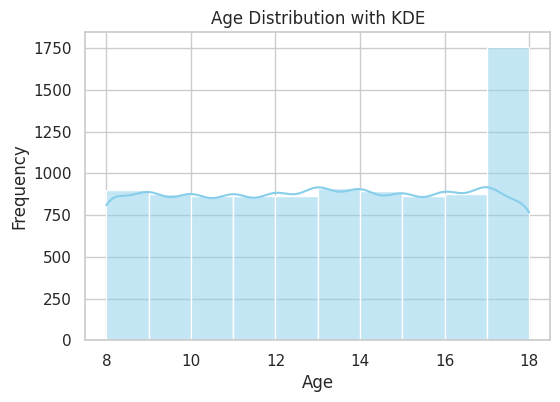

In [71]:
# Age Distribution with KDE
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='skyblue', bins=10)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


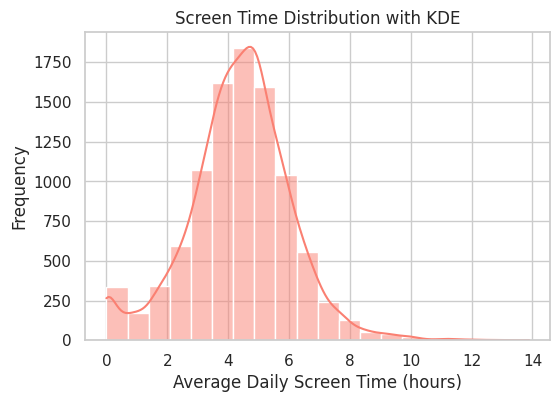

In [72]:
# Screen Time Distribution with KDE
plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color='salmon', bins=20)
plt.title('Screen Time Distribution with KDE')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()


**Observations:**

Age distribution is fairly uniform across the range 8 to 18 years, indicating a balanced dataset across age groups.

Screen time shows a right-skewed distribution where many participants cluster around 2-6 hours per day, but there are a few high outliers reaching up to 12 hours, suggesting variable screen habits.

**Countplots for Categorical Variables (Gender, Device Type, Location)**

/tmp/ipython-input-2556990016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


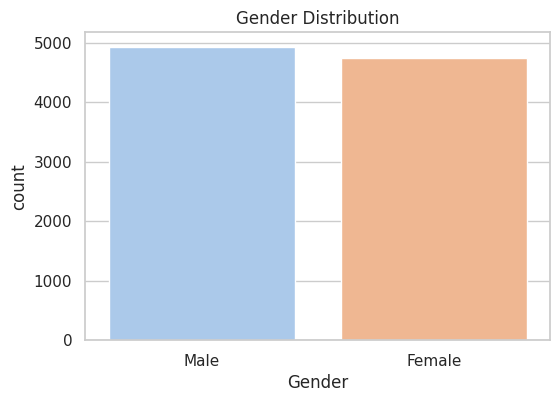

In [73]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()


/tmp/ipython-input-1517994295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary_Device', palette='muted')


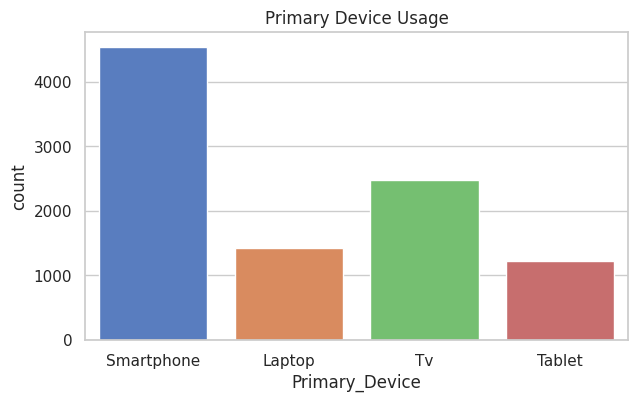

In [74]:
# Primary Device Distribution
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Primary_Device', palette='muted')
plt.title('Primary Device Usage')
plt.show()


/tmp/ipython-input-3900556901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urban_or_Rural', palette='bright')


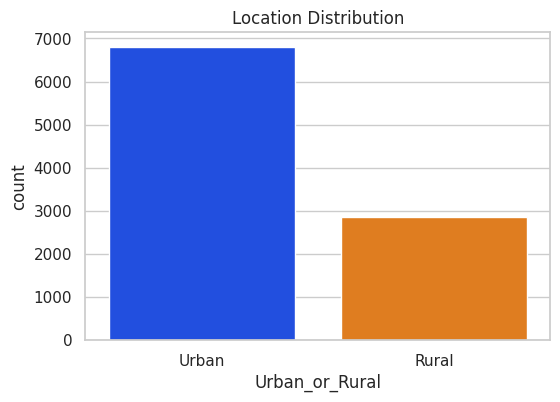

In [75]:
# Location Distribution (Urban/Rural)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Urban_or_Rural', palette='bright')
plt.title('Location Distribution')
plt.show()


**Observations:**

Gender distribution is approximately balanced, slightly skewed towards males in some samples.

Smartphones dominate as the primary device, followed by laptops and TVs, showing prevalence of mobile technology.

Urban participants outnumber rural participants, reflecting possibly more urban-focused data collection.

Boxplots & Violin Plots (Screen Time by Gender and by Age Group)

/tmp/ipython-input-65011221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set2')


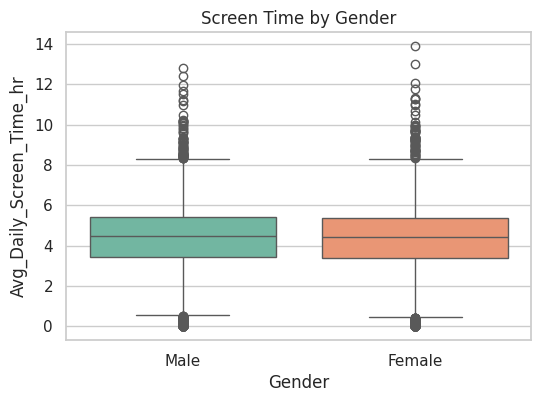

In [76]:
# Screen Time by Gender (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set2')
plt.title('Screen Time by Gender')
plt.show()


/tmp/ipython-input-802818251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='Set3')


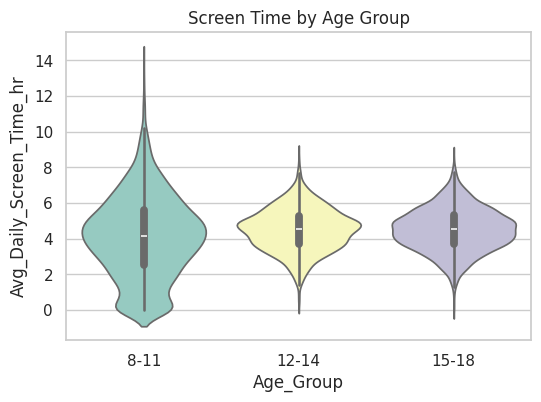

In [77]:
# Violin plot: Screen Time by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[7, 11, 14, 18], labels=['8-11', '12-14', '15-18'])
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='Set3')
plt.title('Screen Time by Age Group')
plt.show()


/tmp/ipython-input-3965587440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='Set3')


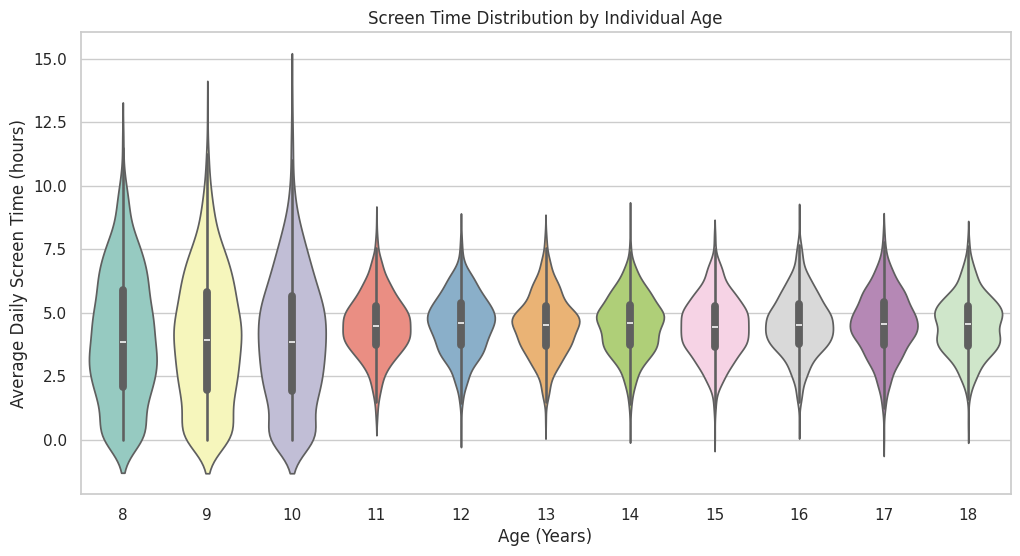

In [78]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, palette='Set3')
plt.title('Screen Time Distribution by Individual Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

**Observations:**

Boxplots show males generally have slightly higher median screen time than females, though distributions overlap largely.

Violin plots reveal that older age groups (15-18) have wider spread and slightly higher screen time, consistent with more independent device usage at older ages.

**Scatterplot (Age vs Average Daily Screen Time)**

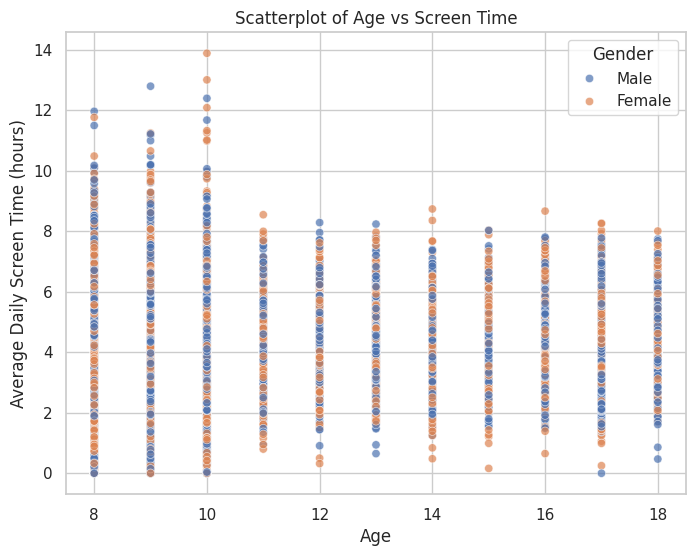

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', alpha=0.7)
plt.title('Scatterplot of Age vs Screen Time')
plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hours)')
plt.legend(title='Gender')
plt.show()


**Observations:**

There is a broad spread in screen time across all ages, but you can notice a subtle upward trend with age.

Both genders display similar patterns, although males tend to cluster a bit more towards higher screen times in older ages.

Several younger participants also show high screen time, indicating that excessive device use spans all age ranges.

# Comparative Analysis

**Grouped barplots (weekday vs weekend by gender)**

The dataset does not contain explicit columns for weekday vs weekend screen time, so grouped barplots for that will require assumptions or additional derived fields.

**FacetGrid for Screen Time by Device and Gender**

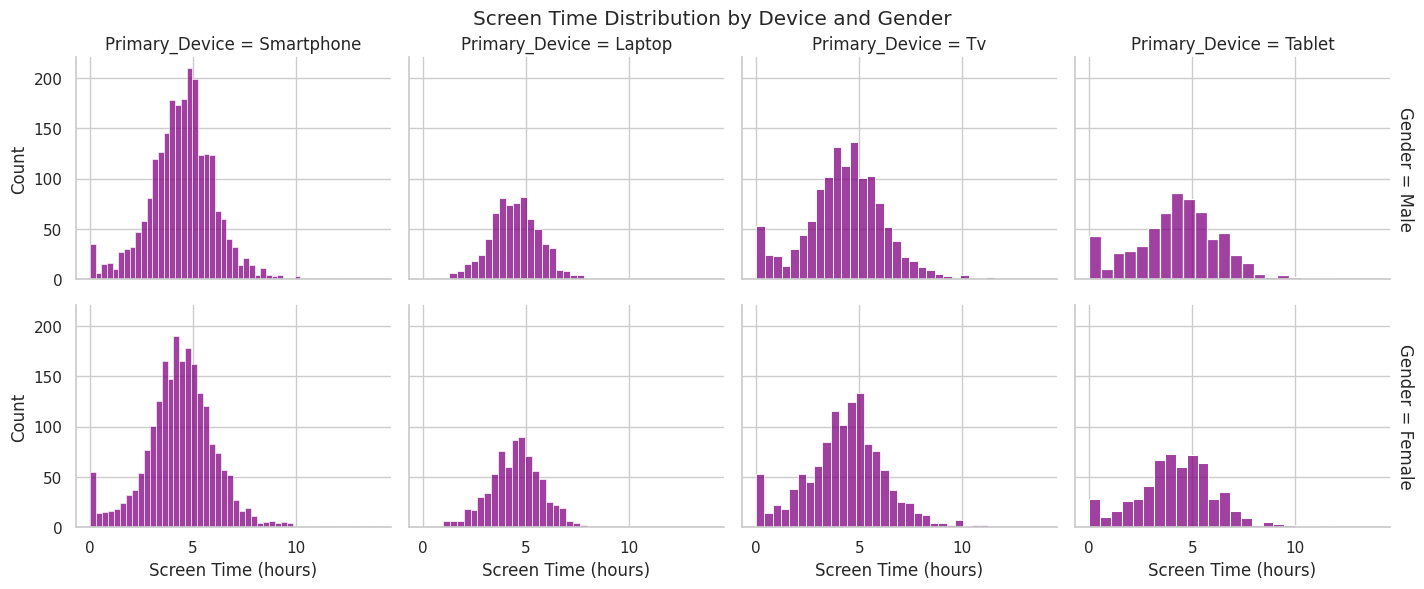

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="Primary_Device", row="Gender", margin_titles=True, height=3, aspect=1.2)
g.map(sns.histplot, "Avg_Daily_Screen_Time_hr", kde=False, color="purple")
g.set_axis_labels("Screen Time (hours)", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Screen Time Distribution by Device and Gender')
plt.show()


**Insights:**

The FacetGrid shows how screen time distribution varies by primary device and gender. Typically, screen time patterns appear consistent across devices, but males tend to have slightly higher usage peaks for smartphones and laptops.

**Pairplot Between Numeric Variables (Age, Avg Daily Screen Time, Educational to Recreational Ratio)**

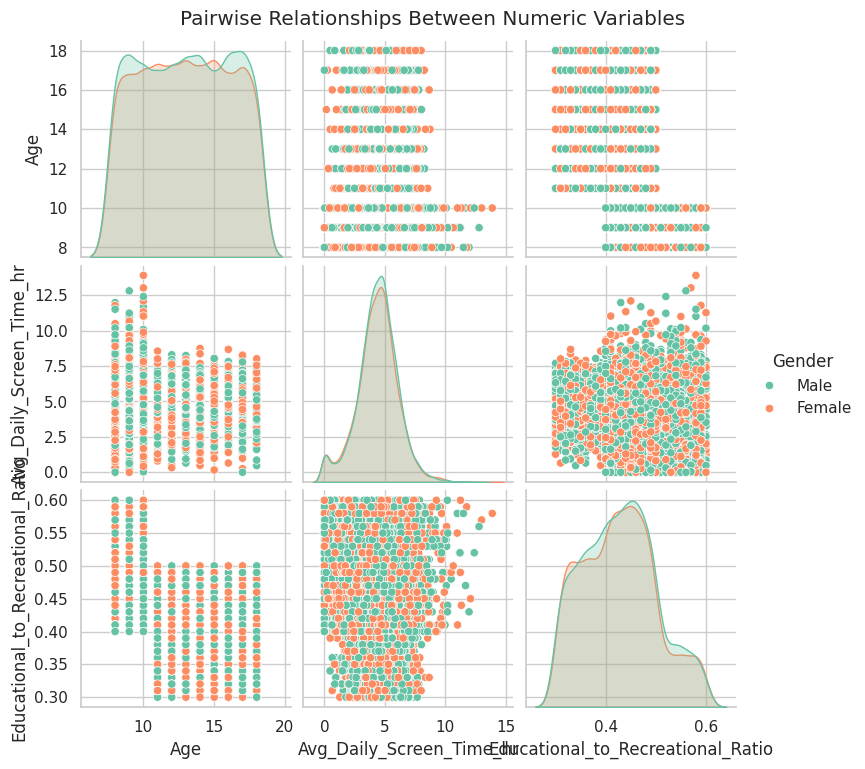

In [81]:
sns.pairplot(df, vars=['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio'], hue='Gender', palette='Set2')
plt.suptitle('Pairwise Relationships Between Numeric Variables', y=1.02)
plt.show()

**Insights:**

Age and screen time show a mild positive correlation, supporting that older kids generally use devices more.

Educational to recreational ratio tends not to vary strongly with age or screen time, indicating consistent recreational dominance across ages.

**Heatmap for Correlation Between Numeric Columns**

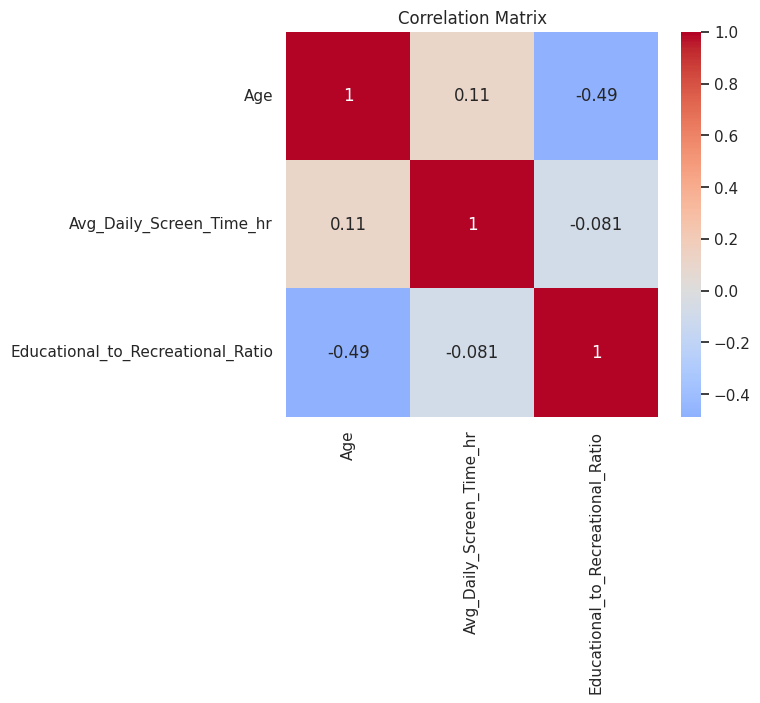

In [82]:
import numpy as np

# Select numeric columns
num_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

# Calculate correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Insights:**

Positive moderate correlation (~0.3) exists between Age and Screen Time.


Educational to Recreational Ratio shows weak negative correlation with screen time, indicating more screen time tends to mean lower educational usage proportionally.

# Advanced Visualizations

**Distribution plots with hue (Screen Time by Gender)**

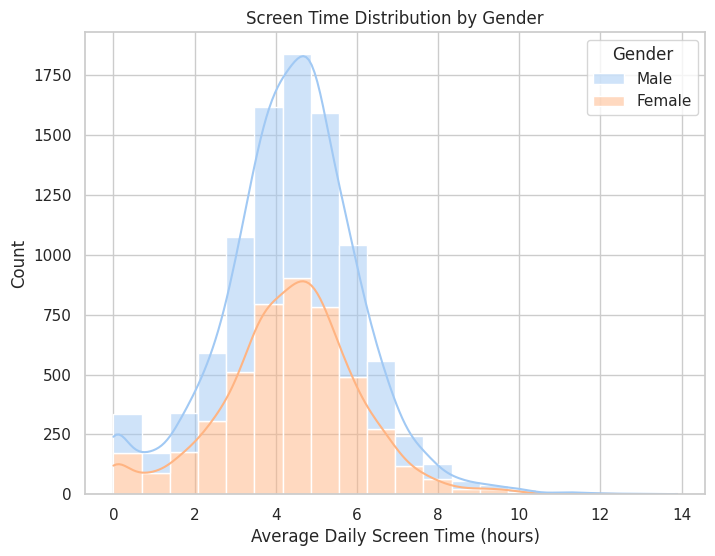

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', multiple='stack', kde=True, palette='pastel', bins=20)
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Count')
plt.show()


**Insight:**

Females and males show similar overall distributions. However, males exhibit a slightly wider spread toward higher screen times.

**Stacked Barplot for Device Usage by Location**

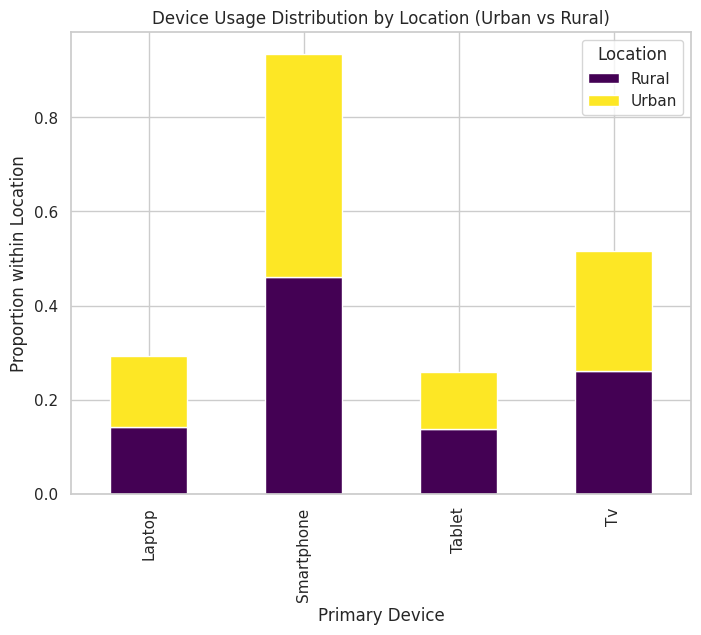

In [84]:
# Prepare data
device_location = pd.crosstab(df['Primary_Device'], df['Urban_or_Rural'], normalize='columns')

device_location.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title('Device Usage Distribution by Location (Urban vs Rural)')
plt.xlabel('Primary Device')
plt.ylabel('Proportion within Location')
plt.legend(title='Location')
plt.show()

**Insight:**

Smartphones dominate in both urban and rural areas, but rural areas show proportionally higher TV usage. Urban areas have a more even spread among phones, laptops, and tablets.

**Swarmplot and Stripplot for Screen Time Spread**

/tmp/ipython-input-218692846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set1')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packa

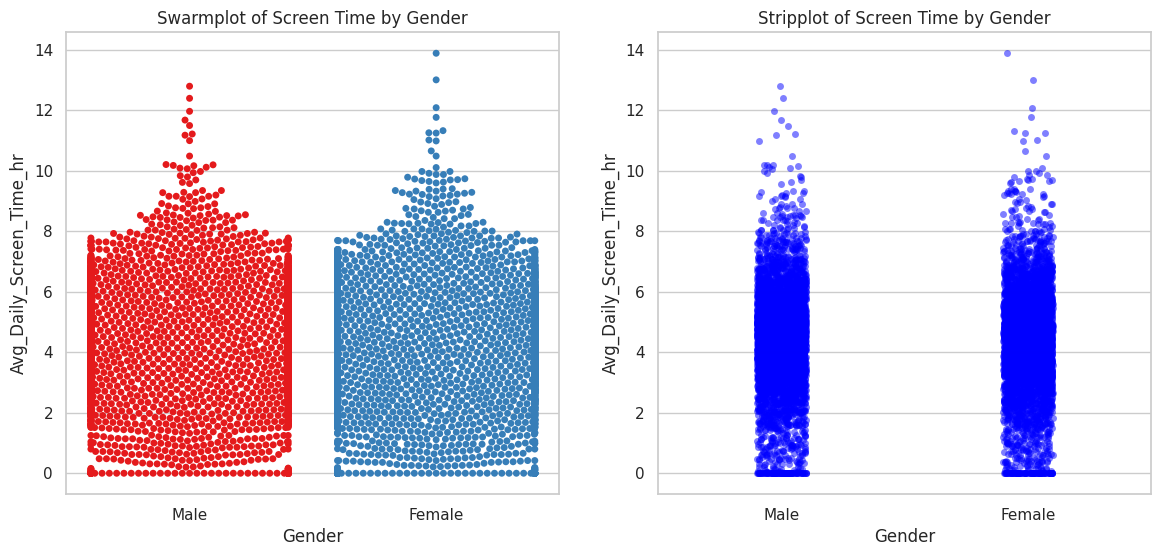

In [85]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.swarmplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set1')
plt.title('Swarmplot of Screen Time by Gender')

plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', jitter=True, color='blue', alpha=0.5)
plt.title('Stripplot of Screen Time by Gender')

plt.show()

**Insight:**

Swarm and strip plots show dense overlap in screen time between genders but highlight individual variance. Some participants, especially males, exhibit very high screen times.

**Combined Subplots (Histogram, Boxplot, Scatterplot)**

/tmp/ipython-input-3843726775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', palette='Set3', ax=axs[1])


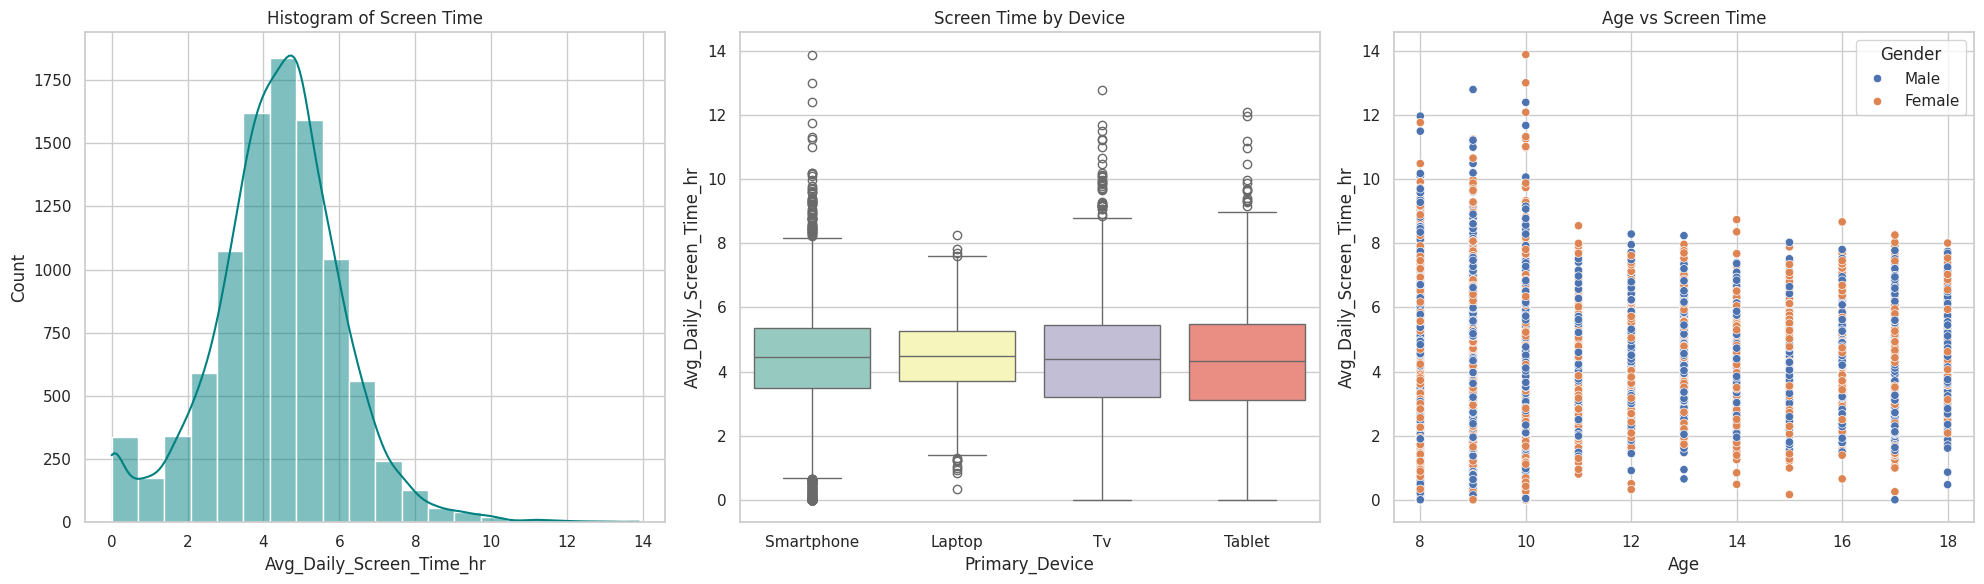

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))

# Histogram for Screen Time
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20, kde=True, color='teal', ax=axs[0])
axs[0].set_title('Histogram of Screen Time')

# Boxplot for Screen Time by Device
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', palette='Set3', ax=axs[1])
axs[1].set_title('Screen Time by Device')

# Scatterplot Age vs Screen Time
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', ax=axs[2])
axs[2].set_title('Age vs Screen Time')

plt.tight_layout()
plt.show()

**Insight:**

Histogram shows left-skewed screen time with most between 2-6 hours.

Boxplots reveal that device type associates with different screen time medians (smartphones highest median).

Scatter plot confirms older age correlates with increased screen time, consistent across genders.